In [7]:
testStat = 'latency_5m_single_transactions'
#testStat = 'latency_5m_single_transactions.transactions_LOCAL_RPC'


# testalgo = 'hbbft'
testalgo1 = 'hbbft'
testrun1 = 'final'
testname1 = 'latency2'

testalgo2 = 'hbbft'
testrun2 = 'runUpgrade'
testname2 = testname1  # most of the time we wan't to compare the same tests against each other.



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We use larger plot areas, adjust to your needs.

plt.rcParams["figure.figsize"] = (25, 15)

import seaborn as sns
sns.set(style="darkgrid")


In [9]:

def addCalcedColumns(df):
    df['durationSendToConfirmation'] = df['timeReceipt'] - df['timeSend']

filepath1 = 'data/' + testalgo1 + '/' + testrun1 + '/' + testname1 +  '/' + testStat + '.transactions.csv'
filepath2 = 'data/' + testalgo2 + '/' + testrun2 + '/' + testname2 +  '/' + testStat + '.transactions.csv'

df1 = pd.read_csv(filepath1)
df2 = pd.read_csv(filepath2)

addCalcedColumns(df1)
addCalcedColumns(df2)

df1.head()


,internalTxID,transactionHash,blockNumber,timeSend,timeReceipt,timeConfirmed,durationSendToConfirmation
0,1,0xf9bbfcdc99344c6153552d897963d775d63daf36bd4c...,12363,1585948418512,1585948419424,1585948419423,912
1,2,0x4af3b26546d4b565f1db069542bc48593c051cbf983a...,12369,1585948423733,1585948425475,1585948425475,1742
2,3,0x70b1b4e855bdd64b85c70858dcdd42a4bcfa61ea3bc8...,12370,1585948425043,1585948425788,1585948425787,745
3,4,0x32a63bcb6e70766103da2ac46547e3c28eb1bcb3ae1b...,12373,1585948427364,1585948429466,1585948429466,2102
4,5,0x5ec0521c7f68f310ee9344e2cef3451df532512ae439...,12375,1585948430369,1585948431406,1585948431406,1037


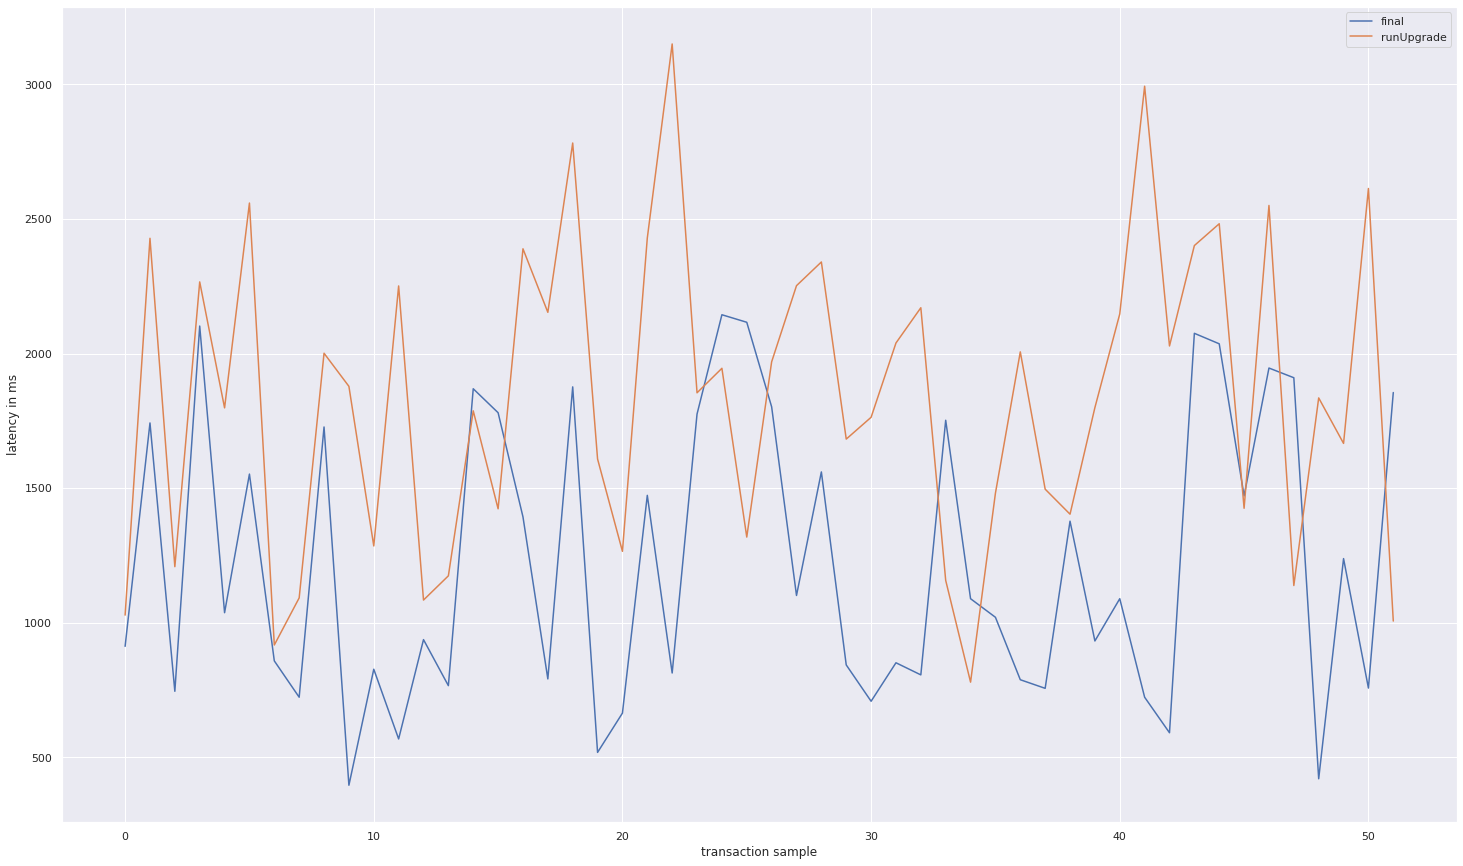

In [10]:
plot = plt.plot(df1.durationSendToConfirmation, label=testrun1)
plot = plt.plot(df2.durationSendToConfirmation, label=testrun2)

plt.xlabel('transaction sample')
plt.ylabel('latency in ms')

plt.legend()


    
#plot = plt.plot(dfAura.durationSendToConfirmation)

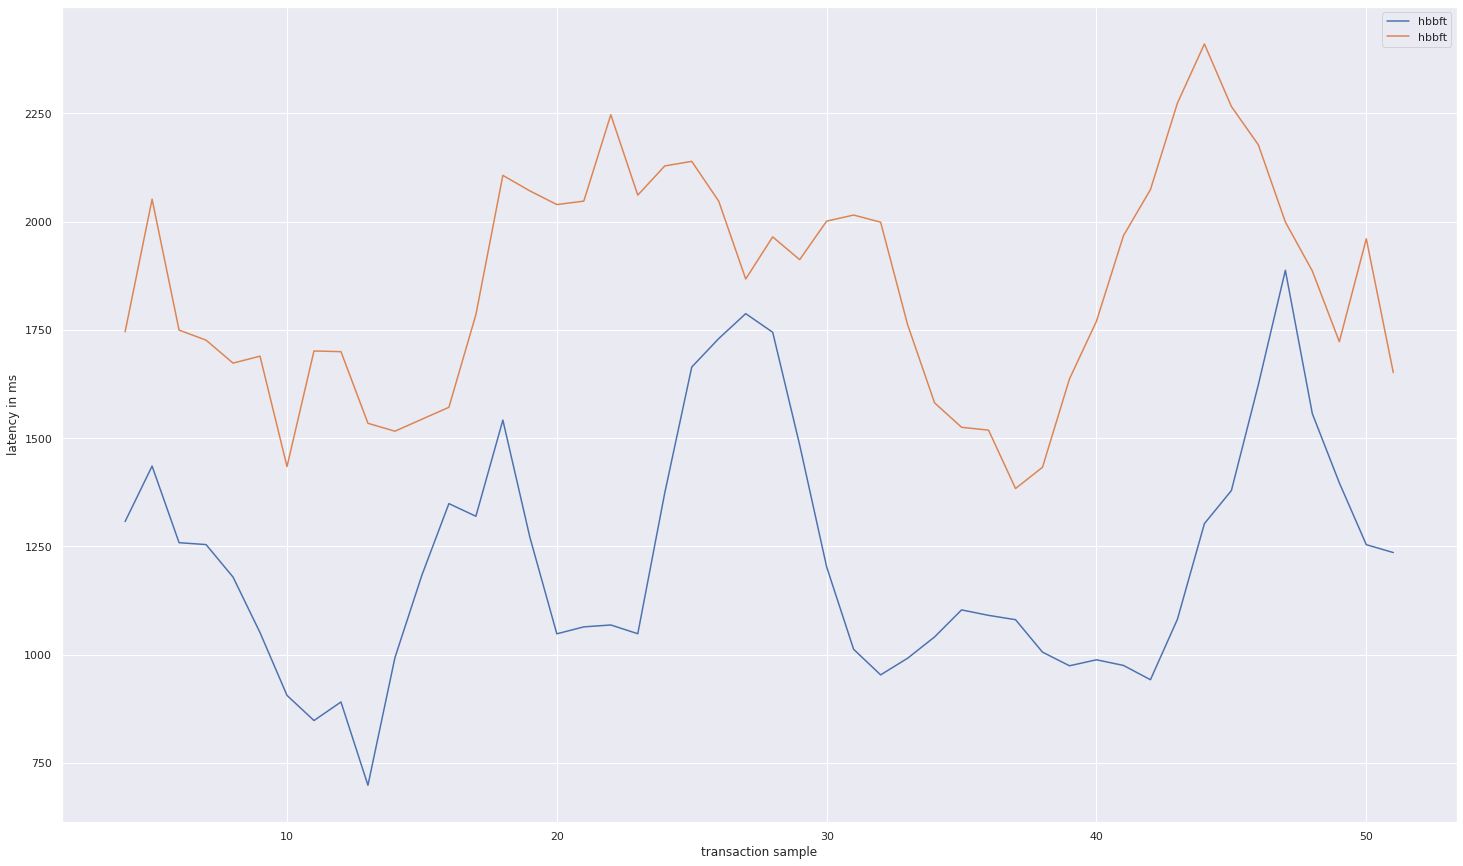

In [11]:
plot = plt.plot(df1.durationSendToConfirmation.rolling(window=5).mean(),  label=testalgo1)
plot = plt.plot(df2.durationSendToConfirmation.rolling(window=5).mean(),  label=testalgo2)
#plot = plt.plot(dfAura.durationSendToConfirmation.rolling(window=5).mean())


plt.xlabel('transaction sample')
plt.ylabel('latency in ms')

plt.legend()

